In [1]:
import data_preprocess
import models
import train 
import numpy as np


## **Data preprocess**

In [2]:
img_size=(200,200)
path=r'D:\MSML\SEM 1\ML\ML Projects\Project 3\DL-CNN\data\flowers'
label_names = ["bougainvillea","daisies","garden_roses","gardenias","hibiscus","hydrangeas","lilies","orchids","peonies","tulip"]
Images,labels,label_idx=data_preprocess.preprocess(img_size=img_size,data_dir=path,label_names=label_names)
Images = np.array(Images, dtype=np.float32)
label_idx = np.array(label_idx, dtype=np.int32)
labels = np.array(labels, dtype=object)
print('img shape:',Images.shape)
print('label idx shape:',label_idx.shape)
print('label length:',len(labels))


100%|██████████| 733/733 [00:15<00:00, 48.35it/s]

img shape: (733, 200, 200, 3)
label idx shape: (733,)
label length: 733


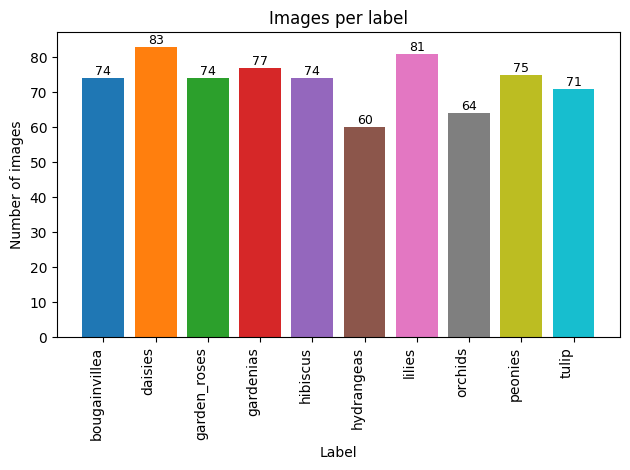

In [3]:
import matplotlib.pyplot as plt

counts = np.bincount(label_idx.astype(int), minlength=len(label_names))
x = np.arange(len(label_names))

plt.figure()
bars = plt.bar(x, counts, color=plt.cm.tab10(x % 10))
plt.xticks(x, label_names, rotation=90, ha="right")
plt.xlabel("Label")
plt.ylabel("Number of images")
plt.title("Images per label")

for b in bars:
    h = b.get_height()
    plt.text(b.get_x() + b.get_width()/2, h, f"{int(h)}", ha="center", va="bottom", fontsize=9)

plt.tight_layout()
plt.show()


## **1. Creating a Convolutional Neural Network for Classification**

### **1.1. Hyper parameters**

In [4]:

droup_outsize=0.30;n_classes=10
test_size=0.2
batch_size=32 # reduced batch size due to memory exhuast issue
n_epochs=50 #early stopping already there 

In [5]:
cnn=models.build_cnn(droup_outsize=droup_outsize,n_classes=n_classes)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 200, 200, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 100, 100, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 100, 100, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 50, 50, 64)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 50, 50, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 50, 50, 64)        3

## **1.2. Compile and train**

In [ ]:
X_test,y_test,model,history=train.train(Images,label_idx,cnn,n_epochs,batch_size)

Epoch 1/50


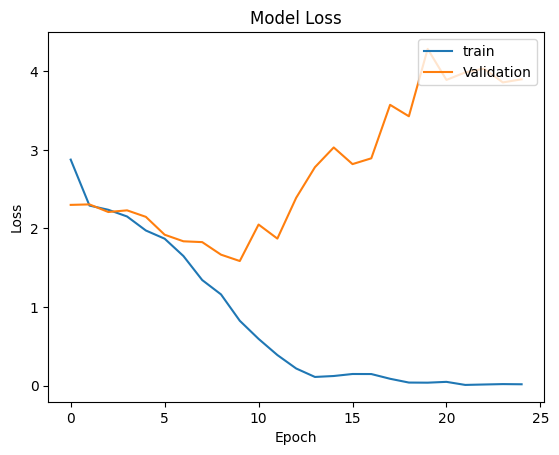

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'Validation'], loc='upper right')
plt.show()

<Figure size 640x480 with 0 Axes>

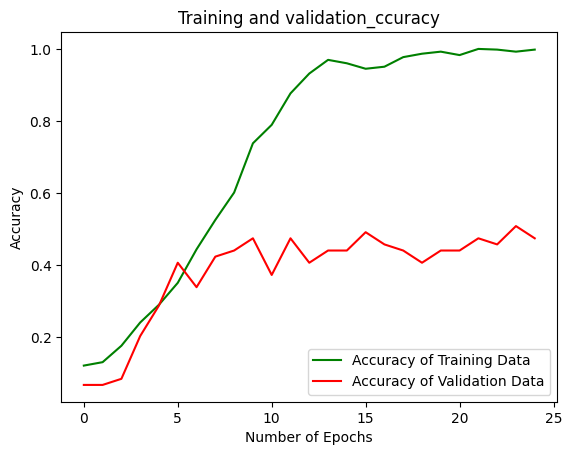

<Figure size 640x480 with 0 Axes>

In [ ]:

epochs = range(len(history.history['accuracy']))

plt.plot(epochs, history.history['accuracy'], 'g', label='Accuracy of Training Data')
plt.plot(epochs, history.history['val_accuracy'], 'r', label='Accuracy of Validation Data')
plt.xlabel('Number of Epochs')
plt.ylabel('Accuracy')
plt.title('Training and validation_ccuracy')
plt.legend(loc=0)
plt.figure()


In [ ]:

from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
from sklearn import metrics
predictions = model.predict(X_test, batch_size= batch_size)
predictions = np.argmax(predictions, axis= 1)
actuals = y_test

testing_accuracy = metrics.accuracy_score(actuals, predictions)
testing_accuracy


5/5 [==============================] - 1s 106ms/step


0.46938775510204084

Text(58.222222222222214, 0.5, 'Truth')

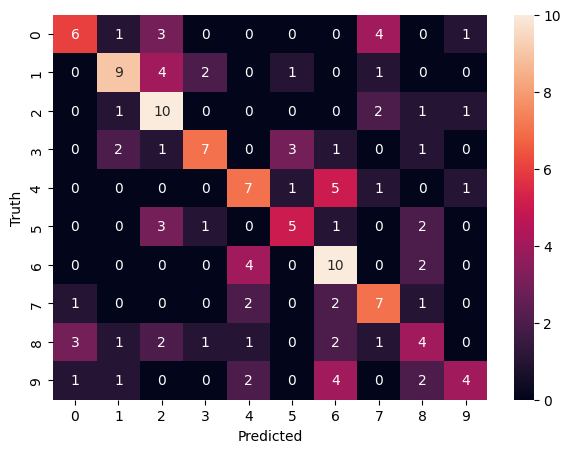

In [ ]:
#cm in visual
cm = confusion_matrix(actuals, predictions)
import seaborn as sn
plt.figure(figsize = (7,5))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
